Phase 2: Exploratory Data Analysis (EDA) on Time Series Data

In [5]:
# Import Statements

import matplotlib.pyplot as plt
import pickle
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

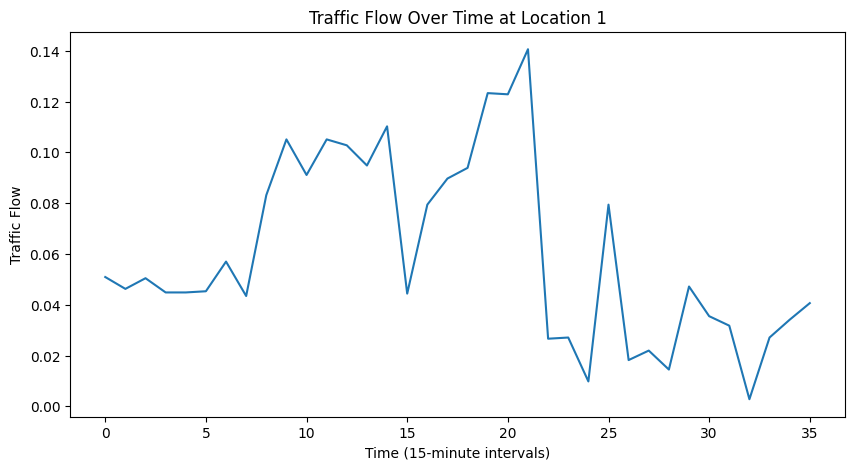

In [6]:
# Load the training data from the pickle files
with open('tra_X_tr.pkl', 'rb') as f:
    tra_X_tr = pickle.load(f)

with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Convert data to pandas DataFrame for easier manipulation
df_tra_X_tr = pd.DataFrame(tra_X_tr[0][0].toarray())  # Convert sparse matrix to dense
df_tra_Y_tr = pd.DataFrame(tra_Y_tr)

# Visualization of Traffic Flow Over Time at Location 1
location_index = 0
traffic_flow_series = df_tra_Y_tr.iloc[:, location_index]

if traffic_flow_series.empty:
    print(f"No data found for location {location_index + 1}")
else:
    # Plot Traffic Flow Over Time
    plt.figure(figsize=(10, 5))
    plt.plot(traffic_flow_series)
    plt.title(f"Traffic Flow Over Time at Location {location_index + 1}")
    plt.xlabel("Time (15-minute intervals)")
    plt.ylabel("Traffic Flow")
    plt.show()

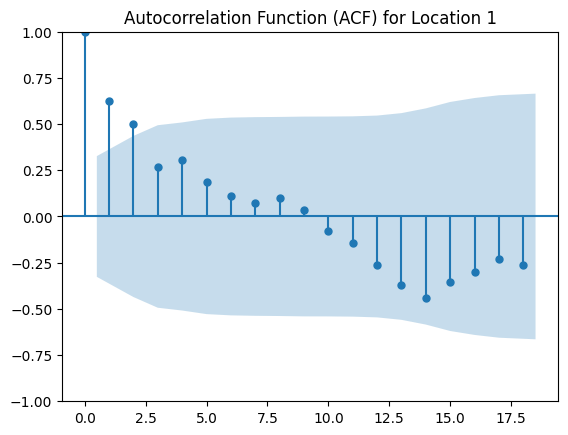

In [7]:
# Visualization of Autocorrelation for Location 1

if traffic_flow_series.empty:
    print(f"No data found for location {location_index + 1}")
else:
    # Determine the number of lags for ACF and PACF based on the series length
    max_lags = min(50, len(traffic_flow_series) // 2)

    # Autocorrelation
    plot_acf(traffic_flow_series, lags=max_lags)
    plt.title(f"Autocorrelation Function (ACF) for Location {location_index + 1}")
    plt.show()

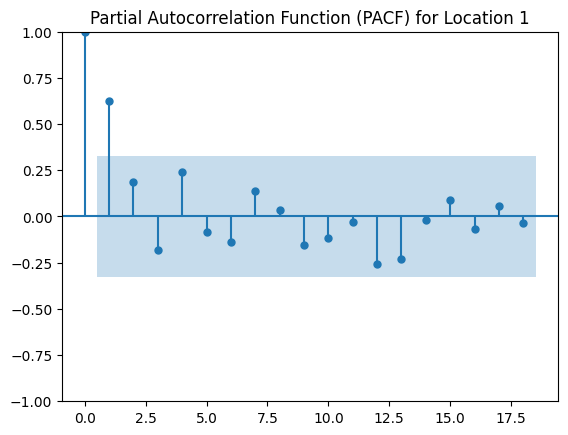

In [8]:
# Visualization of Partial Autocorrelation for Location 1

if traffic_flow_series.empty:
    print(f"No data found for location {location_index + 1}")
else:
    plot_pacf(traffic_flow_series, lags=max_lags)
    plt.title(f"Partial Autocorrelation Function (PACF) for Location {location_index + 1}")
    plt.show()

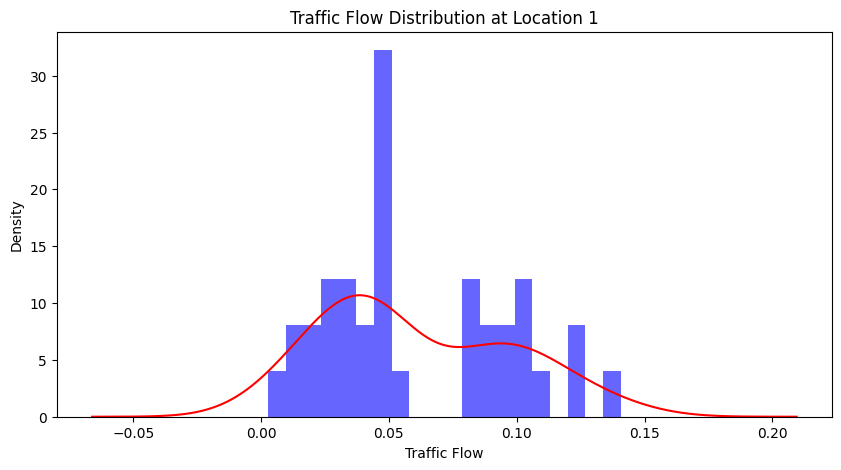

In [9]:
# Visualization of Traffic Flow Distribution at Location 1

plt.figure(figsize=(10, 5))
traffic_flow_series.plot(kind='hist', bins=20, alpha=0.6, color='blue', density=True)
traffic_flow_series.plot(kind='kde', color='red')
plt.title(f"Traffic Flow Distribution at Location {location_index + 1}")
plt.xlabel("Traffic Flow")
plt.ylabel("Density")
plt.show()

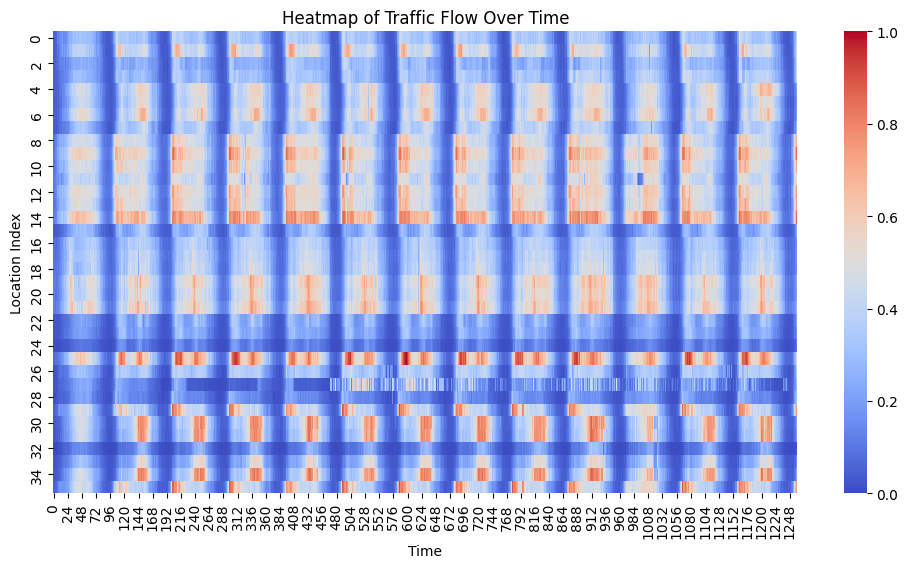

In [11]:
# Visualization of Traffic Flow Over Time (all locations)

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df_tra_Y_tr, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Traffic Flow Over Time")
plt.xlabel("Time")
plt.ylabel("Location Index")
plt.show()


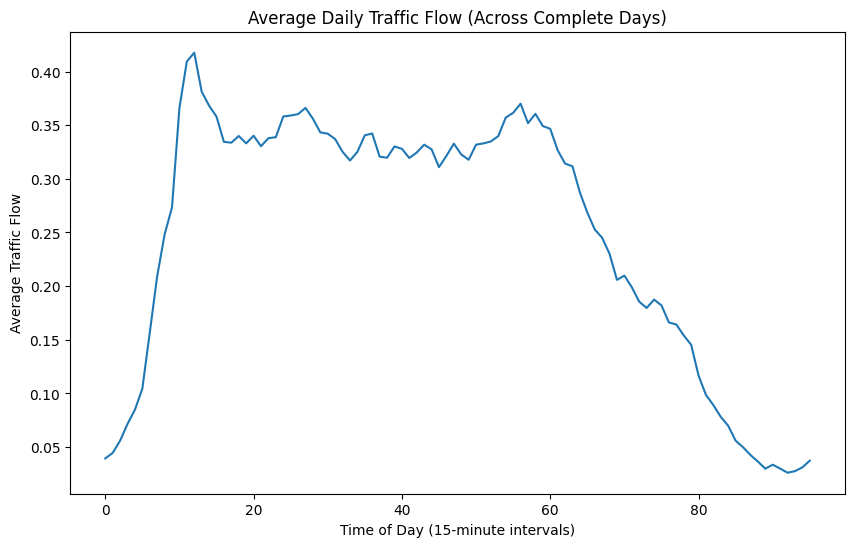

In [13]:
# Visualization of Average Daily Traffic Flow (across complete days)

# Calculate how much to truncate to make it divisible by 96
num_intervals_per_day = 96
num_complete_days = len(df_tra_Y_tr.iloc[0, :]) // num_intervals_per_day
truncated_length = num_complete_days * num_intervals_per_day

# Truncate the data
daily_traffic = df_tra_Y_tr.iloc[0, :truncated_length].values.reshape(-1, num_intervals_per_day)
daily_traffic_mean = daily_traffic.mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(daily_traffic_mean)
plt.title("Average Daily Traffic Flow (Across Complete Days)")
plt.xlabel("Time of Day (15-minute intervals)")
plt.ylabel("Average Traffic Flow")
plt.show()


Citations:
starter_noteboook_traffic_flow_prediction.py

(Code provided by the class.)